## Question2. Do older planes suffer more delays? 

In [1]:
import sqlite3
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
#change to the direectory where the files are stored
os.chdir('C:\\Users\\juhyu\\OneDrive\\Desktop\\JH\\SIM\\Year2\\Programming for data science\\Coursework material\\dataverse_files')

In [3]:
# ====== create tables ======
airline2003=pd.read_csv('2003.csv.bz2', compression='bz2', low_memory=False,error_bad_lines=False,skiprows=lambda x: x%2 ==1)
airline2004=pd.read_csv('2004.csv.bz2', compression='bz2', low_memory=False,error_bad_lines=False,skiprows=lambda x: x%2 ==1)
airline2005=pd.read_csv('2005.csv.bz2', compression='bz2', low_memory=False,error_bad_lines=False,skiprows=lambda x: x%2 ==1)

C:\Users\juhyu\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
frames=[airline2003,airline2004,airline2005]
df=pd.concat(frames)
df

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2003,1,30,4,1654.0,1655,1910.0,1913,UA,1017,...,2,26,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2003,1,1,3,1033.0,1035,1625.0,1634,UA,1018,...,6,11,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2003,1,3,5,1031.0,1035,1640.0,1634,UA,1018,...,13,13,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2003,1,5,7,1035.0,1035,1636.0,1634,UA,1018,...,5,9,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2003,1,1,3,1713.0,1710,1851.0,1847,UA,1020,...,7,29,0,NaN,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3570293,2005,12,22,4,758.0,759,1247.0,1241,DL,895,...,6,14,0,NaN,0,0.0,0.0,0.0,0.0,0.0
3570294,2005,12,22,4,1256.0,1300,1306.0,1311,DL,897,...,6,22,0,NaN,0,0.0,0.0,0.0,0.0,0.0
3570295,2005,12,22,4,1652.0,1655,1815.0,1837,DL,901,...,7,15,0,NaN,0,0.0,0.0,0.0,0.0,0.0
3570296,2005,12,22,4,1507.0,1511,1641.0,1649,DL,903,...,4,29,0,NaN,0,0.0,0.0,0.0,0.0,0.0


In [5]:
#Getting the column names in dataframe
df.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [6]:
#=====reading data for planes=====
planes=pd.read_csv('plane-data.csv', low_memory=False,error_bad_lines=False)

C:\Users\juhyu\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [7]:
planes

,tailnum,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,year
0,N050AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,N051AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,N052AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,N054AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,N055AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
5024,N997DL,Corporation,MCDONNELL DOUGLAS AIRCRAFT CO,03/11/1992,MD-88,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1992
5025,N998AT,Corporation,BOEING,01/23/2003,717-200,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2002
5026,N998DL,Corporation,MCDONNELL DOUGLAS CORPORATION,04/02/1992,MD-88,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1992
5027,N999CA,Foreign Corporation,CANADAIR,07/09/2008,CL-600-2B19,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1998


In [8]:
#getting column names in planes data frame
planes.columns

Index(['tailnum', 'type', 'manufacturer', 'issue_date', 'model', 'status',
       'aircraft_type', 'engine_type', 'year'],
      dtype='object')

To find out how many percent of old planes have delay, we are going to join the tables and compare delays. 

In [10]:
#Assigning 'DepHour'
df['DepHour']=df['DepTime'][:2]
df['DepHour']

0          1654.0
1          1033.0
2             NaN
3             NaN
4             NaN
            ...  
3570293       NaN
3570294       NaN
3570295       NaN
3570296       NaN
3570297       NaN
Name: DepHour, Length: 10379203, dtype: float64

In [11]:
# taking out information on scheduled departure time(CRSDepTime) and Dep delay 
df[['DepTime','DepDelay']].head()

,DepTime,DepDelay
0,1654.0,-1.0
1,1033.0,-2.0
2,1031.0,-4.0
3,1035.0,0.0
4,1713.0,3.0


In [12]:
planes.isnull().sum()

tailnum            0
type             549
manufacturer     549
issue_date       549
model            549
status           549
aircraft_type    549
engine_type      549
year             549
dtype: int64

In [13]:
# Drop NA values from planes data
planes=planes.dropna()
planes

,tailnum,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,year
34,N10156,Corporation,EMBRAER,02/13/2004,EMB-145XR,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2004
35,N102UW,Corporation,AIRBUS INDUSTRIE,05/26/1999,A320-214,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1998
36,N10323,Corporation,BOEING,07/01/1997,737-3TO,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1986
37,N103US,Corporation,AIRBUS INDUSTRIE,06/18/1999,A320-214,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1999
38,N104UA,Corporation,BOEING,01/26/1998,747-422,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1998
...,...,...,...,...,...,...,...,...,...
5024,N997DL,Corporation,MCDONNELL DOUGLAS AIRCRAFT CO,03/11/1992,MD-88,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1992
5025,N998AT,Corporation,BOEING,01/23/2003,717-200,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2002
5026,N998DL,Corporation,MCDONNELL DOUGLAS CORPORATION,04/02/1992,MD-88,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1992
5027,N999CA,Foreign Corporation,CANADAIR,07/09/2008,CL-600-2B19,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1998


In [14]:
planes['year']

34      2004
35      1998
36      1986
37      1999
38      1998
        ... 
5024    1992
5025    2002
5026    1992
5027    1998
5028    1992
Name: year, Length: 4480, dtype: object

In [15]:
planes['year'].isnull().sum() #checking number of na values

0

In [16]:
planes

,tailnum,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,year
34,N10156,Corporation,EMBRAER,02/13/2004,EMB-145XR,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2004
35,N102UW,Corporation,AIRBUS INDUSTRIE,05/26/1999,A320-214,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1998
36,N10323,Corporation,BOEING,07/01/1997,737-3TO,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1986
37,N103US,Corporation,AIRBUS INDUSTRIE,06/18/1999,A320-214,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1999
38,N104UA,Corporation,BOEING,01/26/1998,747-422,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1998
...,...,...,...,...,...,...,...,...,...
5024,N997DL,Corporation,MCDONNELL DOUGLAS AIRCRAFT CO,03/11/1992,MD-88,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1992
5025,N998AT,Corporation,BOEING,01/23/2003,717-200,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2002
5026,N998DL,Corporation,MCDONNELL DOUGLAS CORPORATION,04/02/1992,MD-88,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1992
5027,N999CA,Foreign Corporation,CANADAIR,07/09/2008,CL-600-2B19,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1998


In [17]:
planes['year'] = planes['year'].apply (pd.to_numeric, errors = 'coerce')
planes['year']

C:\Users\juhyu\AppData\Local\Temp/ipykernel_13956/2706192402.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  planes['year'] = planes['year'].apply (pd.to_numeric, errors = 'coerce')


34      2004.0
35      1998.0
36      1986.0
37      1999.0
38      1998.0
         ...  
5024    1992.0
5025    2002.0
5026    1992.0
5027    1998.0
5028    1992.0
Name: year, Length: 4480, dtype: float64

In [18]:
planes['year'].unique()

array([2004., 1998., 1986., 1999., 2002., 1994., 2003., 2005., 2006.,
       2000., 2001., 1997., 1995., 1996., 1987., 1985.,   nan, 1988.,
       1968., 1990., 1991., 1969., 1970., 1992., 1993., 1965., 1989.,
       1959., 1980., 2008., 1983.,    0., 1984., 2007., 1967., 1975.,
       1979., 1957., 1974., 1978., 1963., 1956., 1972., 1962., 1973.,
       1982., 1976., 1964., 1977., 1946., 1966., 1971.])

In [19]:
planes['year']=planes['year'].loc[planes['year']<2005]

C:\Users\juhyu\AppData\Local\Temp/ipykernel_13956/1961154211.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  planes['year']=planes['year'].loc[planes['year']<2005]


In [20]:
planes['year'].unique()

array([2004., 1998., 1986., 1999., 2002., 1994., 2003.,   nan, 2000.,
       2001., 1997., 1995., 1996., 1987., 1985., 1988., 1968., 1990.,
       1991., 1969., 1970., 1992., 1993., 1965., 1989., 1959., 1980.,
       1983.,    0., 1984., 1967., 1975., 1979., 1957., 1974., 1978.,
       1963., 1956., 1972., 1962., 1973., 1982., 1976., 1964., 1977.,
       1946., 1966., 1971.])

In [21]:
#create a column to calculate the age of planes : 2022-'year'
planes['age'] = 2022 - (planes['year']).astype(float)
planes['age']

C:\Users\juhyu\AppData\Local\Temp/ipykernel_13956/2135108695.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  planes['age'] = 2022 - (planes['year']).astype(float)


34      18.0
35      24.0
36      36.0
37      23.0
38      24.0
        ... 
5024    30.0
5025    20.0
5026    30.0
5027    24.0
5028    30.0
Name: age, Length: 4480, dtype: float64

In [22]:
planes['year']=planes['year'].astype('Int64')
planes['age']=planes['age'].astype('Int64')
planes

C:\Users\juhyu\AppData\Local\Temp/ipykernel_13956/1437669450.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  planes['year']=planes['year'].astype('Int64')
C:\Users\juhyu\AppData\Local\Temp/ipykernel_13956/1437669450.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  planes['age']=planes['age'].astype('Int64')


,tailnum,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,year,age
34,N10156,Corporation,EMBRAER,02/13/2004,EMB-145XR,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2004,18
35,N102UW,Corporation,AIRBUS INDUSTRIE,05/26/1999,A320-214,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1998,24
36,N10323,Corporation,BOEING,07/01/1997,737-3TO,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1986,36
37,N103US,Corporation,AIRBUS INDUSTRIE,06/18/1999,A320-214,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1999,23
38,N104UA,Corporation,BOEING,01/26/1998,747-422,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1998,24
...,...,...,...,...,...,...,...,...,...,...
5024,N997DL,Corporation,MCDONNELL DOUGLAS AIRCRAFT CO,03/11/1992,MD-88,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1992,30
5025,N998AT,Corporation,BOEING,01/23/2003,717-200,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2002,20
5026,N998DL,Corporation,MCDONNELL DOUGLAS CORPORATION,04/02/1992,MD-88,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1992,30
5027,N999CA,Foreign Corporation,CANADAIR,07/09/2008,CL-600-2B19,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1998,24


In [23]:
planes[planes['age']>2000]

,tailnum,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,year,age
725,N235SW,Corporation,EMBRAER,03/19/1996,EMB-120ER,Valid,Fixed Wing Multi-Engine,Turbo-Prop,0,2022
962,N298AE,Corporation,SAAB-SCANIA,05/15/1998,SAAB 340B,Valid,Fixed Wing Multi-Engine,Turbo-Prop,0,2022
1489,N384AE,Corporation,SAAB-SCANIA,10/29/1996,SAAB 340B,Valid,Fixed Wing Multi-Engine,Turbo-Prop,0,2022


Now, we need 'age' and delay datas to be in a single dataframe to compare them. 
Hence, let's left join 'planes_copy' to df using tail number.

In [24]:
planes=planes.rename(columns={'tailnum':'TailNum'})

In [25]:
df=df[['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'TailNum','ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest']]

In [26]:
df.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'TailNum', 'ActualElapsedTime',
       'CRSElapsedTime', 'AirTime', 'ArrDelay', 'DepDelay', 'Origin', 'Dest'],
      dtype='object')

In [27]:
planes.columns

Index(['TailNum', 'type', 'manufacturer', 'issue_date', 'model', 'status',
       'aircraft_type', 'engine_type', 'year', 'age'],
      dtype='object')

In [28]:
data1=pd.merge(df,planes,how='left')
data1

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,TailNum,ActualElapsedTime,...,Dest,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,year,age
0,2003,1,30,4,1654.0,1655,1910.0,1913,N311UA,136.0,...,MSY,Corporation,BOEING,01/14/1988,737-322,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1987,35
1,2003,1,1,3,1033.0,1035,1625.0,1634,N409UA,232.0,...,ORD,Corporation,AIRBUS INDUSTRIE,06/10/2004,A320-232,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1994,28
2,2003,1,3,5,1031.0,1035,1640.0,1634,N412UA,249.0,...,ORD,Corporation,AIRBUS INDUSTRIE,05/20/2004,A320-232,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1994,28
3,2003,1,5,7,1035.0,1035,1636.0,1634,N828UA,241.0,...,ORD,Corporation,AIRBUS INDUSTRIE,06/16/1999,A319-131,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1999,23
4,2003,1,1,3,1713.0,1710,1851.0,1847,N567UA,98.0,...,BOS,Corporation,BOEING,07/26/2006,757-222,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1992,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10379198,2005,12,22,4,758.0,759,1247.0,1241,N666DN,169.0,...,ATL,Corporation,BOEING,03/22/1991,757-232,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1991,31
10379199,2005,12,22,4,1256.0,1300,1306.0,1311,N983DL,70.0,...,VPS,Corporation,MCDONNELL DOUGLAS AIRCRAFT CO,04/25/2007,MD-88,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1991,31
10379200,2005,12,22,4,1652.0,1655,1815.0,1837,N109DL,263.0,...,ONT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>
10379201,2005,12,22,4,1507.0,1511,1641.0,1649,N306DL,154.0,...,SAT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>


In [29]:
data2=data1.dropna()

In [30]:
data2

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,TailNum,ActualElapsedTime,...,Dest,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,year,age
0,2003,1,30,4,1654.0,1655,1910.0,1913,N311UA,136.0,...,MSY,Corporation,BOEING,01/14/1988,737-322,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1987,35
1,2003,1,1,3,1033.0,1035,1625.0,1634,N409UA,232.0,...,ORD,Corporation,AIRBUS INDUSTRIE,06/10/2004,A320-232,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1994,28
2,2003,1,3,5,1031.0,1035,1640.0,1634,N412UA,249.0,...,ORD,Corporation,AIRBUS INDUSTRIE,05/20/2004,A320-232,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1994,28
3,2003,1,5,7,1035.0,1035,1636.0,1634,N828UA,241.0,...,ORD,Corporation,AIRBUS INDUSTRIE,06/16/1999,A319-131,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1999,23
4,2003,1,1,3,1713.0,1710,1851.0,1847,N567UA,98.0,...,BOS,Corporation,BOEING,07/26/2006,757-222,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1992,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10379196,2005,12,22,4,1319.0,1115,1642.0,1423,N960DL,143.0,...,ATL,Corporation,MCDONNELL DOUGLAS AIRCRAFT CO,06/19/1990,MD-88,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1990,32
10379197,2005,12,22,4,1805.0,1805,1913.0,1910,N3730B,68.0,...,ATL,Corporation,BOEING,09/25/2000,737-832,Valid,Fixed Wing Multi-Engine,Turbo-Jet,2000,22
10379198,2005,12,22,4,758.0,759,1247.0,1241,N666DN,169.0,...,ATL,Corporation,BOEING,03/22/1991,757-232,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1991,31
10379199,2005,12,22,4,1256.0,1300,1306.0,1311,N983DL,70.0,...,VPS,Corporation,MCDONNELL DOUGLAS AIRCRAFT CO,04/25/2007,MD-88,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1991,31


In [31]:
data2[['DepTime','CRSDepTime','DepDelay']].sample(10)

,DepTime,CRSDepTime,DepDelay
3821240,856.0,850,6.0
4219320,1330.0,1305,25.0
7660534,1739.0,1740,-1.0
3195797,2134.0,2101,33.0
4577599,2037.0,2010,27.0
7793914,1816.0,1825,-9.0
7806460,1850.0,1851,-1.0
1588036,1459.0,1500,-1.0
7898999,657.0,700,-3.0
1137769,1812.0,1800,12.0


In [32]:
data2['totaldelay']=data2['DepDelay']+data2['ArrDelay']

C:\Users\juhyu\AppData\Local\Temp/ipykernel_13956/4254683060.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['totaldelay']=data2['DepDelay']+data2['ArrDelay']


[Text(1, 0, '')]

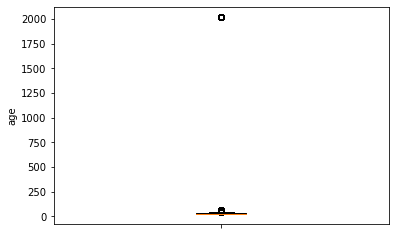

In [33]:
#creating boxplot to see the range of age groups and create age group
fig, ax = plt.subplots()

ax.boxplot(data2['age'])
ax.set_ylabel('age')
ax.set_xticklabels(['']) #no label for x-axis

In [ ]:
#Removing outlier in the age series, which is 2000.

In [34]:
data2=data2[data2['age']<2000]

[Text(1, 0, '')]

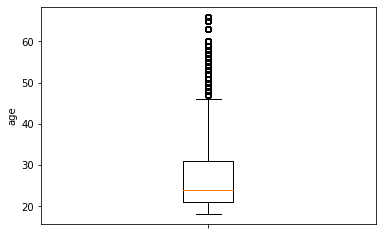

In [35]:
fig, ax = plt.subplots()

ax.boxplot(data2['age'])
ax.set_ylabel('age')
ax.set_xticklabels([''])

In [36]:
bins= [0,20,30,40,50,60,70]
labels = ['10-20','20-30','30-40','40-50','50-60','60-70']
data2['AgeGroup'] = pd.cut(data2['age'], bins=bins, labels=labels, right=False)

C:\Users\juhyu\AppData\Local\Temp/ipykernel_13956/639233684.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['AgeGroup'] = pd.cut(data2['age'], bins=bins, labels=labels, right=False)


In [37]:
totaldelay_perage=data2.groupby('AgeGroup')['totaldelay'].sum()

#### We will now plot the bar graph of total delay per age group to investigate if older planes suffer more delays. 

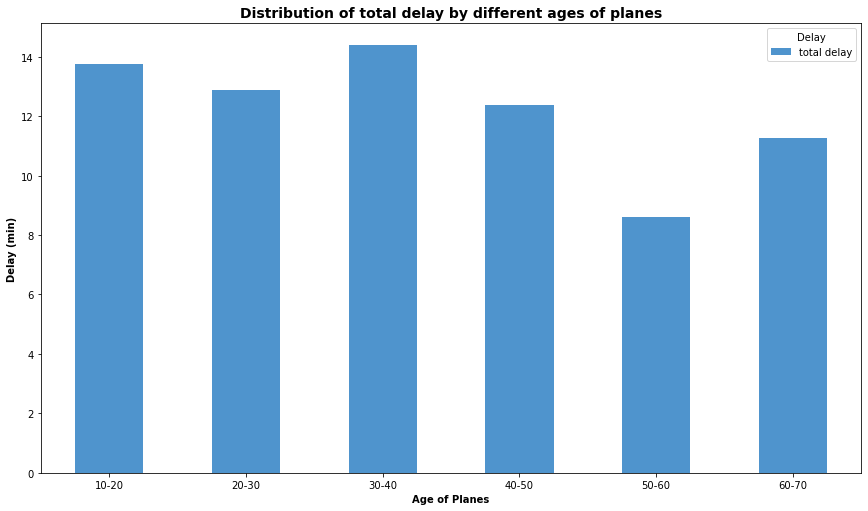

In [38]:
# Plotting distribution of departure delays over a day 
colors = ['#4F94CD']

# plot 
bar_data = data2.groupby('AgeGroup')[['totaldelay']].mean().plot.bar(
    figsize=[14.70, 8.27], color=colors)

# title, lables & legend
plt.title("Distribution of total delay by different ages of planes", fontsize = 14, weight = "bold")
plt.ylabel('Delay (min)', fontsize = 10, weight = "bold")
plt.xlabel('Age of Planes', fontsize = 10, weight = "bold")
plt.xticks(rotation=360)

plt.legend(['total delay'], title="Delay")
plt.show()

##### From the bar graph above, it seems that younger planes(10-40) tend to suffer more delays than older planes(40-70). 
##### To investigate deep down, we will plot pie to compare proportion of delay per different age groups. 

In [39]:
#Grouping DepDelay and ArrDelay per agegroup
depdelay_perage=data2.groupby('AgeGroup')['DepDelay'].sum()
arrdelay_perage=data2.groupby('AgeGroup')['ArrDelay'].sum()

In [40]:
depdelay_perage

AgeGroup
10-20     4767869.0
20-30    25476301.0
30-40    13414219.0
40-50      665998.0
50-60      500087.0
60-70       48898.0
Name: DepDelay, dtype: float64

In [41]:
arrdelay_perage

AgeGroup
10-20     3606092.0
20-30    21281833.0
30-40    11776527.0
40-50      730228.0
50-60      611462.0
60-70       35515.0
Name: ArrDelay, dtype: float64

In [43]:
#Creating a list of population for each age groups
age_pop=list(data2['AgeGroup'].value_counts())
age_pop

[3628546, 1748783, 608512, 129137, 112741, 7495]

In [44]:
agegroups=data2['AgeGroup'].unique()

#converting to list of age groups
agegroups=list(agegroups)

#arranging agegroups in ascending order
agegroups.sort()
agegroups

['10-20', '20-30', '30-40', '40-50', '50-60', '60-70']

In [45]:
agegroups

['10-20', '20-30', '30-40', '40-50', '50-60', '60-70']

In [46]:
#removing the 'nan' in list
agegroups = [str(x) for x in agegroups]
agegroups=[x for x in agegroups if x != 'nan']

In [47]:
agegroups

['10-20', '20-30', '30-40', '40-50', '50-60', '60-70']

<AxesSubplot:title={'center':'ARRDELAY'}>

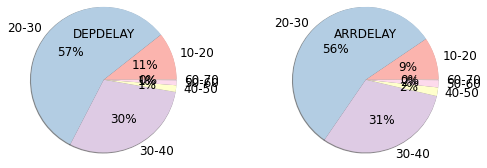

In [48]:
#We will now plot the pie chart

textprops={"fontsize":12}

plt.subplot(1,4,1)
ax.xaxis.set_label_position('top')
depdelay_perage.plot.pie(label='',title = "DEPDELAY",colormap='Pastel1', autopct='%1.0f%%',radius=2.5,textprops=textprops,shadow=True) 

plt.subplot(1,4,4)
arrdelay_perage.plot.pie(label='',title = "ARRDELAY",colormap='Pastel1', autopct='%1.0f%%',radius=2.5,textprops=textprops,shadow=True)


#### From the graphs above, we can re-verify that % weightage for both departure delay and arrival delay is much higher in younger planes (10-40) than older planes(40-70). Hence, older planes do not suffer more delays. 